In [49]:
pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 8.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 5.3 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 5.2 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 4.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 4.8 MB/s eta 0:00:00
  


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#load dataset
df = pd.read_csv("Loan_default.csv")
#display the top 5 rows
df.head()
# Check the column names and data types
print(df.columns)
print(df.dtypes)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [64]:
df.isnull().sum()
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


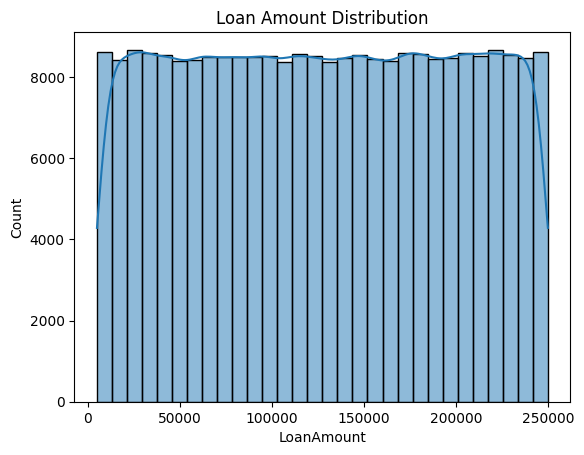

In [82]:
# Plot loan amount distribution
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

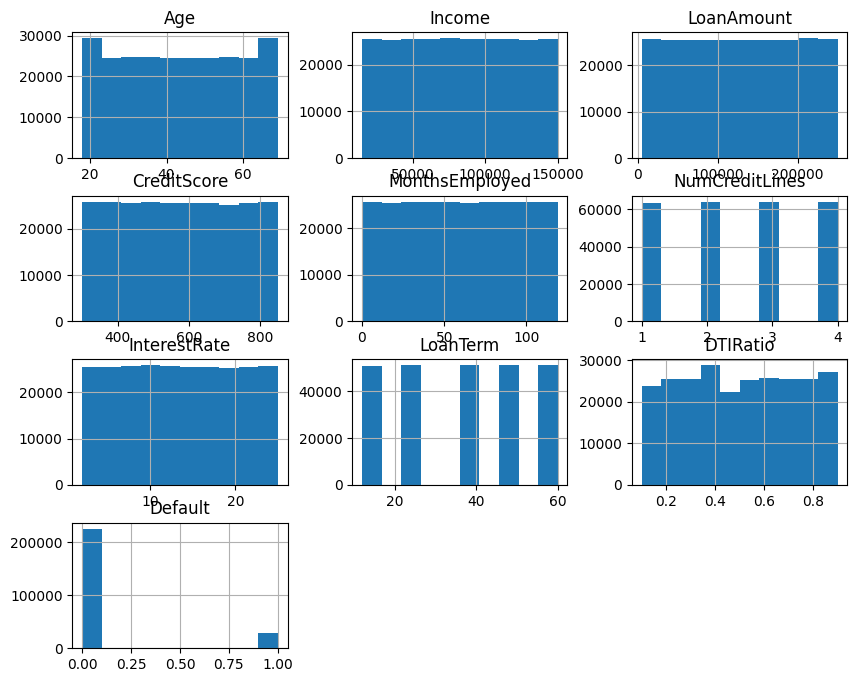

In [65]:
df.hist(figsize=(10, 8))
plt.show()

In [58]:
# Convert categorical columns into dummy variables
df = pd.get_dummies(df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], drop_first=True)

# Calculate Loan Default Rate
default_rate = df['Default'].mean()
print(f"Loan Default Rate: {default_rate * 100:.2f}%")

Loan Default Rate: 11.61%


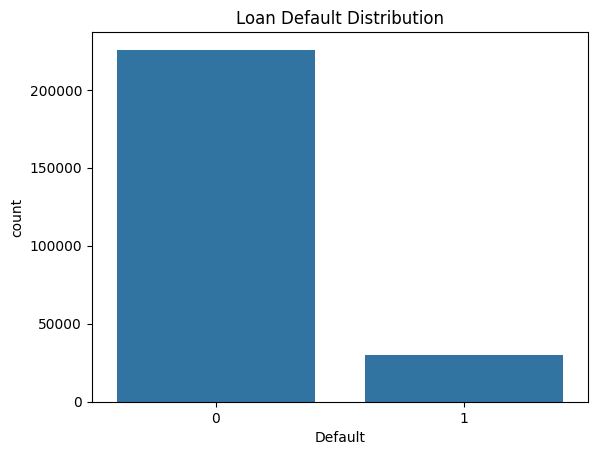

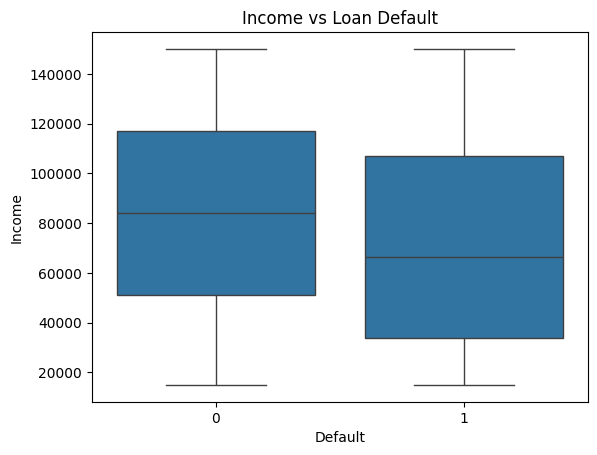

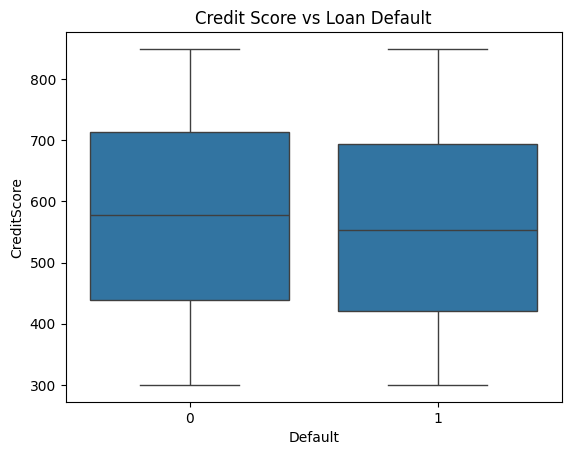

In [59]:
# Visualize Loan Default Distribution
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.show()

# Loan Default Rate by Income
sns.boxplot(x='Default', y='Income', data=df)
plt.title("Income vs Loan Default")
plt.show()

# Loan Default Rate by Credit Score
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title("Credit Score vs Loan Default")
plt.show()

# Features (X) and Target (y)
X = df.drop('Default', axis=1)
y = df['Default']


In [76]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = df.drop('Default', axis=1)  # Features
y = df['Default']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [85]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,False,False,False,False,False,False,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,False,False,False,True,False,False,False,False,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,False,False,False,True,False,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,False,False,False,True,False,True,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,False,False,False,True,False,False,False,False,False,False


In [86]:
from sklearn.model_selection import train_test_split

# Define X (features) and Y (target)
X = df.drop(columns=['Default'])
Y = df['Default'].map({'Y': 1, 'N': 0})  # Convert to binary

# Train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
